In [ ]:
'''
간단 설명!

1.
문장 분리에 nltk.tokenize 사용했는데 오류 나면
https://lemontia.tistory.com/802 <- 이게 해결방법일 확률이 높음

2.
한국어는 문장에 명사만 남겨서 cosine similarity 돌렸는데 영어는 굳이 그럴 필요가 없을것 같아서 문장 분리 후 바로 돌림

3.
15문장 이상인 경우 15문장만 남기게 했음
원래 코드는 sum 출력시 중요도가 높은 문장부터 출력했는데 
이거는 train 데이터로 들어갈때 문장 순서가 섞이면 영향이 있을 수도 있을 것 같아서
기존 문장 순서에서 상위 15개 문장이 아닌 문장들을 지우는 방향으로 수정함

4.
print들은 확인용 지워도 노상관

5.
일단 돌려보는 걸 추천!

6.
필요한게 있다면 바로 연락주세용
'''

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import itertools
from nltk.tokenize import sent_tokenize
import os

In [32]:
class SentenceTokenizer(object):
    def text2sentences(self, text):
        sentences = sent_tokenize(text)

        return sentences

In [33]:
class GraphMatrix(object):
    def __init__(self):
        self.tfidf = TfidfVectorizer()
        self.cnt_vec = CountVectorizer()

    def build_mat(self, sentence):
        tfidf_mat = self.tfidf.fit_transform(sentence).toarray()
        return tfidf_mat

In [34]:
class TextRank(object):
        
    def summarize(self, article):
        n_text = SentenceTokenizer().text2sentences(article)
        
        if len(n_text) <= 3:
            return 0
        
        mat = GraphMatrix().build_mat(n_text)
        
        def co_sim(n1, n2):
            A = mat[n1]
            B = mat[n2]
            div = norm(A)*norm(B)
            if (div == 0):
                return 0
            return dot(A, B)/div

        graph = nx.Graph()
        
        for idx in range(len(n_text)):
            graph.add_node(idx)
        
        pairs = list(itertools.combinations(range(len(n_text)), 2))
    
        for n1, n2 in pairs:
            sim = co_sim(n1, n2)
            if sim != 0:
                graph.add_edge(n1, n2, weight=sim)

        nx.draw_networkx(graph)
        plt.show()
    
        pagerank = nx.pagerank(graph, weight='weight')
        reordered = sorted(pagerank, key=pagerank.get, reverse=False)
        #출력될 문장의 수가 n개인 경우 reordered[:-n-1]로 수정하면 됨 (default 15문장)
        reordered = reordered[:-16]
        #print(pagerank)
        #print(reordered)
        
        ex_sum = []

        for n in range(0, len(n_text)):
            if n in reordered:
                continue
            ex_sum.append(n_text[n])
        
        graph.clear()

        return ex_sum

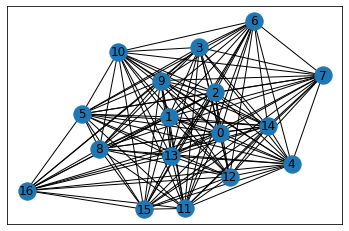

summarize:['-LRB- CNN -RRB- For the second time during his papacy , Pope Francis has announced a new group of bishops and archbishops set to become cardinals -- and they come from all over the world .', "Pope Francis said Sunday that he would hold a meeting of cardinals on February 14 `` during which I will name 15 new Cardinals who , coming from 13 countries from every continent , manifest the indissoluble links between the Church of Rome and the particular Churches present in the world , '' according to Vatican Radio .", 'New cardinals are always important because they set the tone in the church and also elect the next pope , CNN Senior Vatican Analyst John L. Allen said .', 'They are sometimes referred to as the princes of the Catholic Church .', 'The new cardinals come from countries such as Ethiopia , New Zealand and Myanmar .', "`` This is a pope who very much wants to reach out to people on the margins , and you clearly see that in this set , '' Allen said .", "`` You 're talkin

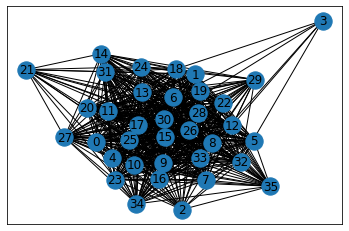

summarize:['The four were twice cleared for release -- once by the Bush administration and again this year , according to a Justice Department statement .', "The four were flown by private plane Wednesday night from Cuba to Bermuda and were accompanied by U.S. and Bermudan representatives as well as their attorneys , according to Susan Baker Manning , part of the men 's legal team .", 'A political backlash against bringing any of the detainees to the United States has increased the focus on sending them to other countries .', "Brown said he read an article on the issue of the Guantanamo Bay detainees ' fates in The Washington Post while he was in Washington for a White House meeting in May .", "He said he decided to put an offer to the U.S. government `` on the table . ''", "The issue is controversial because of China 's opposition to the Uyghurs being sent to any country but China .", 'The 17 Uyghurs had left China and made their way to Afghanistan , where they settled in a camp with 

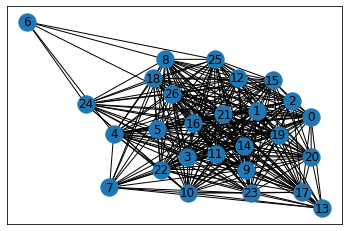

summarize:['Kathmandu , Nepal -LRB- CNN -RRB- -- A ferocious leopard may have killed 15 people in Nepal in a 15-month span , its latest victim a 4-year-old boy that the creature dragged away into the jungle to eat .', 'The head of boy was found in the forest a kilometer from his home Saturday morning , said Kamal Prasad Kharel , the police chief of the Baitadi district , an area about 600 kilometers -LRB- 373 miles -RRB- west of Kathmandu .', 'The grisly discovery , which came after teams of people searched for the child , marks the 15th victim in the past 15 months in that remote district in western Nepal .', 'The police chief suspects that a single man-eating leopard is responsible for the deaths .', 'Maheshwor Dhakal , an ecologist at the Department of National Parks and Wildlife Conservation in Kathmandu , agreed that it is unusual to find more than one or two man-eating animals in one area .', 'Kharel said he feared the actual number of people killed by the leopard could be higher

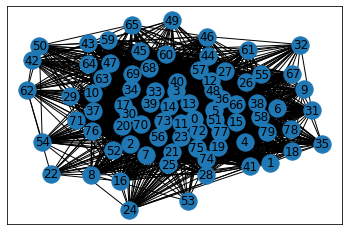

summarize:["-LRB- CNN -RRB- -- Kyle White now has two pieces of metal to wear -- one , a bracelet inscribed with the names of his six comrades killed in an ambush in Afghanistan , the other , a Medal of Honor given to him for his valor that ensured that death toll was n't higher .", "The former Army sergeant said Tuesday he owes it to these men , whom he calls `` my heroes , '' to live his life well , even now that he 's left the military , and with honor .", "And I vow to live up to the responsibility of doing so , '' White said .", "White himself insisted that the Medal of Honor can not really be an individual award , calling it `` a testament to the trust we have in each other and our leaders . ''", "He aced it , and in doing so represented the best of what Obama called the `` 9/11 generation -LRB- which -RRB- has proven itself to be one of America 's greatest . ''", "`` Today , '' the President said to a crowd that included White , his parents and many of his former comrades , `` w

In [37]:
tr = TextRank()

#파일 이름들이 엉망이라 해당 폴더의 파일리스트를 긁어와서 대입하는 방향으로 진행
path = './data' #파일들이 있는 폴더를 path에 지정
file_list = os.listdir(path)
filelist = [fi for fi in file_list if fi.endswith(".story")] #해당 path안 파일리스트 가져온 후 story 파일만 거름

#현재는 파일리스트를 긁어오면 파일리스트에 들어있는 파일 전부를 for문으로 전처리
#train 단계마다 data를 전처리 하려면 이부분를 수정해서 사용하면 됨!
#지정해준 경로 폴더를 미리 생성하지 않은 경우 오류 발생할 수 있음
for filen in filelist:
    with open(f'./data/{filen}', 'r') as file: #fstring 문법 헷갈리면 파이썬 fstring으로 검색
        te = file.read()
        text = te.split('@highlight')[0] #이게 본문 전체
        hight = te.split('@highlight')[1:] #이게 highlight 문장들을 리스트로, 헷갈리면 print해보는것 추천
        
        '''
        #하이라이트 따로 저장하는 부분 필요하면 사용
        #default는 txt 파일이지만 변경 하고 싶은 경우 파일명 수정
        with open(f'./data/hight/{filen}.txt', 'w') as filew: 
            for i in range(0, len(hight)):
                filew.write(hight[i])
        '''
        
        sentences = sent_tokenize(text) #문단을 문장 리스트로 토크나이즈
        if(len(sentences) > 15): #문장의 갯수가 n보다 클 경우 현재 n=15
            ext = tr.summarize(text) #summarize
            print(f'summarize:{ext}')
